In [5]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Lade Datensets
fpoe_davor_n = pd.read_csv("fpoe_davor_n.csv", parse_dates=[0], index_col=0)
fpoe_danach_n = pd.read_csv("fpoe_danach_n.csv", parse_dates=[0], index_col=0)
# Angelobung_Datum = "2017-12-18"

gruene_davor_n = pd.read_csv("gruene_davor_n.csv", parse_dates=[0], index_col=0)
gruene_danach_n = pd.read_csv("gruene_danach_n.csv", parse_dates=[0], index_col=0)

spoe_davor_n = pd.read_csv("spoe_davor_n.csv", parse_dates=[0], index_col=0)
spoe_danach_n = pd.read_csv("spoe_danach_n.csv", parse_dates=[0], index_col=0)

In [9]:
fpoe_davor_monat = fpoe_davor_n['Sentiment Score normalised']
fpoe_davor_monat = fpoe_davor_monat.resample('ME').mean()
display(fpoe_davor_monat)

fpoe_danach_monat = fpoe_danach_n['Sentiment Score normalised']
fpoe_danach_monat = fpoe_danach_monat.resample('ME').mean()
display(fpoe_danach_monat)

Datum
2016-12-31   -0.358126
2017-01-31   -0.382044
2017-02-28   -0.368830
2017-03-31   -0.381682
2017-04-30   -0.376738
2017-05-31   -0.391810
2017-06-30   -0.383175
2017-07-31   -0.399376
2017-08-31   -0.381095
2017-09-30   -0.377530
2017-10-31   -0.399793
2017-11-30   -0.359179
2017-12-31   -0.385602
Freq: ME, Name: Sentiment Score normalised, dtype: float64

Datum
2017-12-31   -0.389118
2018-01-31   -0.402698
2018-02-28   -0.388917
2018-03-31   -0.414920
2018-04-30   -0.396882
2018-05-31   -0.383430
2018-06-30   -0.412499
2018-07-31   -0.406330
2018-08-31   -0.400896
2018-09-30   -0.408958
2018-10-31   -0.391669
2018-11-30   -0.408135
2018-12-31   -0.399285
Freq: ME, Name: Sentiment Score normalised, dtype: float64

In [11]:
gruene_davor_monat = gruene_davor_n['Sentiment Score normalised']
gruene_davor_monat = gruene_davor_monat.resample('ME').mean()
display(gruene_davor_monat)

gruene_danach_monat = gruene_danach_n['Sentiment Score normalised']
gruene_danach_monat = gruene_danach_monat.resample('ME').mean()
display(gruene_danach_monat)

Datum
2019-01-31   -0.412879
2019-02-28   -0.420162
2019-03-31   -0.431169
2019-04-30   -0.401811
2019-05-31   -0.396926
2019-06-30   -0.398966
2019-07-31   -0.417108
2019-08-31   -0.386551
2019-09-30   -0.395450
2019-10-31   -0.396795
2019-11-30   -0.375631
2019-12-31   -0.368570
2020-01-31   -0.338397
Freq: ME, Name: Sentiment Score normalised, dtype: float64

Datum
2020-01-31   -0.330833
2020-02-29   -0.365557
2020-03-31   -0.359936
2020-04-30   -0.352875
2020-05-31   -0.348663
2020-06-30   -0.363550
2020-07-31   -0.341802
2020-08-31   -0.359154
2020-09-30   -0.364281
2020-10-31   -0.350436
2020-11-30   -0.374207
2020-12-31   -0.357584
2021-01-31   -0.423407
Freq: ME, Name: Sentiment Score normalised, dtype: float64

In [13]:
spoe_davor_monat = spoe_davor_n['Sentiment Score normalised']
spoe_davor_monat = spoe_davor_monat.resample('ME').mean()
display(spoe_davor_monat)

spoe_danach_monat = spoe_danach_n['Sentiment Score normalised']
spoe_danach_monat = spoe_danach_monat.resample('ME').mean()
display(spoe_danach_monat)

Datum
2006-01-31   -0.385720
2006-02-28   -0.391341
2006-03-31   -0.386061
2006-04-30   -0.389319
2006-05-31   -0.386545
2006-06-30   -0.377460
2006-07-31   -0.393332
2006-08-31   -0.386684
2006-09-30   -0.388766
2006-10-31   -0.357479
2006-11-30   -0.363541
2006-12-31   -0.365156
2007-01-31   -0.346444
Freq: ME, Name: Sentiment Score normalised, dtype: float64

Datum
2007-01-31   -0.357843
2007-02-28   -0.353417
2007-03-31   -0.344326
2007-04-30   -0.355648
2007-05-31   -0.348928
2007-06-30   -0.355345
2007-07-31   -0.348464
2007-08-31   -0.349813
2007-09-30   -0.348478
2007-10-31   -0.349302
2007-11-30   -0.348755
2007-12-31   -0.356451
2008-01-31   -0.339926
Freq: ME, Name: Sentiment Score normalised, dtype: float64

In [15]:
def avg_std_davor_danach(data_davor: pd.DataFrame, data_danach: pd.DataFrame):
    avg_davor = data_davor['Sentiment Score normalised'].mean()
    std_davor = data_davor['Sentiment Score normalised'].std()

    avg_danach = data_danach['Sentiment Score normalised'].mean()
    std_danach = data_danach['Sentiment Score normalised'].std()

    print(f"{data_davor['Partei'].iloc[0]}-Durchschnitt vor der Angelobung: {avg_davor}")
    print(f"{data_davor['Partei'].iloc[0]}-Standard-Abweichung vor der Angelobung: {std_davor}")
    print("")
    print(f"{data_danach['Partei'].iloc[0]}-Durchschnitt nach der Angelobung: {avg_danach}")
    print(f"{data_danach['Partei'].iloc[0]}-Standard-Abweichung nach der Angelobung: {std_danach}")

    return avg_davor, std_danach, avg_danach, std_danach

In [17]:
fpoe_davor_avg, fpoe_davor_std, fpoe_danach_avg, fpoe_danach_std = avg_std_davor_danach(fpoe_davor_n, fpoe_danach_n)

FPÖ-Durchschnitt vor der Angelobung: -0.3823510879050619
FPÖ-Standard-Abweichung vor der Angelobung: 0.09634169428581493

FPÖ-Durchschnitt nach der Angelobung: -0.40136528246839664
FPÖ-Standard-Abweichung nach der Angelobung: 0.1137566745500665


In [19]:
gruene_davor_avg, gruene_davor_std, gruene_danach_avg, gruene_danach_std = avg_std_davor_danach(gruene_davor_n, gruene_danach_n)

Grüne-Durchschnitt vor der Angelobung: -0.40043754733518816
Grüne-Standard-Abweichung vor der Angelobung: 0.11215992987117758

Grüne-Durchschnitt nach der Angelobung: -0.3570135866644098
Grüne-Standard-Abweichung nach der Angelobung: 0.06981008109083515


In [21]:
spoe_davor_avg, spoe_davor_std, spoe_danach_avg, spoe_danach_std = avg_std_davor_danach(spoe_davor_n, spoe_danach_n)

SPÖ-Durchschnitt vor der Angelobung: -0.3826766018025535
SPÖ-Standard-Abweichung vor der Angelobung: 0.09801250340152877

SPÖ-Durchschnitt nach der Angelobung: -0.3507152820392354
SPÖ-Standard-Abweichung nach der Angelobung: 0.05570055375522108


In [23]:
# Berechne den t-test
def t_test_partei(data_davor: pd.DataFrame, data_danach: pd.DataFrame):
    group1 = np.array(data_davor['Sentiment Score normalised'])
    group2 = np.array(data_danach['Sentiment Score normalised'])
    
    # t-Test durchführen
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test (ungleiche Varianzen)
    print(f"T-Wert für {data_davor['Partei'].iloc[0]}: {t_stat:.3f}, p-Wert: {p_value:.3f}")

    return t_stat, p_value

In [25]:
t_stat_fpoe, p_value_fpoe = t_test_partei(fpoe_davor_n, fpoe_danach_n)

T-Wert für FPÖ: 3.926, p-Wert: 0.000


In [27]:
t_stat_gruene, p_value_gruene = t_test_partei(gruene_davor_n, gruene_danach_n)

T-Wert für Grüne: -7.043, p-Wert: 0.000


In [29]:
t_stat_spoe, p_value_spoe = t_test_partei(spoe_davor_n, spoe_danach_n)

T-Wert für SPÖ: -19.413, p-Wert: 0.000


In [31]:
def daten_gesamt_zeit(data_davor: pd.DataFrame, data_danach: pd.DataFrame, intervall: str):
    daten_gesamt = pd.concat([data_davor, data_danach], axis=0)
    daten_gesamt = daten_gesamt['Sentiment Score normalised']
    daten_gesamt = daten_gesamt.resample(intervall, origin='end').mean()

    return daten_gesamt

In [33]:
fpoe_gesamt_monat = daten_gesamt_zeit(fpoe_davor_n, fpoe_danach_n, 'ME')
display(fpoe_gesamt_monat)

Datum
2016-12-31   -0.358126
2017-01-31   -0.382044
2017-02-28   -0.368830
2017-03-31   -0.381682
2017-04-30   -0.376738
2017-05-31   -0.391810
2017-06-30   -0.383175
2017-07-31   -0.399376
2017-08-31   -0.381095
2017-09-30   -0.377530
2017-10-31   -0.399793
2017-11-30   -0.359179
2017-12-31   -0.388114
2018-01-31   -0.402698
2018-02-28   -0.388917
2018-03-31   -0.414920
2018-04-30   -0.396882
2018-05-31   -0.383430
2018-06-30   -0.412499
2018-07-31   -0.406330
2018-08-31   -0.400896
2018-09-30   -0.408958
2018-10-31   -0.391669
2018-11-30   -0.408135
2018-12-31   -0.399285
Freq: ME, Name: Sentiment Score normalised, dtype: float64

In [35]:
gruene_gesamt_monat = daten_gesamt_zeit(gruene_davor_n, gruene_danach_n, 'ME')
display(gruene_gesamt_monat)

Datum
2019-01-31   -0.412879
2019-02-28   -0.420162
2019-03-31   -0.431169
2019-04-30   -0.401811
2019-05-31   -0.396926
2019-06-30   -0.398966
2019-07-31   -0.417108
2019-08-31   -0.386551
2019-09-30   -0.395450
2019-10-31   -0.396795
2019-11-30   -0.375631
2019-12-31   -0.368570
2020-01-31   -0.331521
2020-02-29   -0.365557
2020-03-31   -0.359936
2020-04-30   -0.352875
2020-05-31   -0.348663
2020-06-30   -0.363550
2020-07-31   -0.341802
2020-08-31   -0.359154
2020-09-30   -0.364281
2020-10-31   -0.350436
2020-11-30   -0.374207
2020-12-31   -0.357584
2021-01-31   -0.423407
Freq: ME, Name: Sentiment Score normalised, dtype: float64

In [37]:
spoe_gesamt_monat = daten_gesamt_zeit(spoe_davor_n, spoe_danach_n, 'ME')
display(spoe_gesamt_monat)

Datum
2006-01-31   -0.385720
2006-02-28   -0.391341
2006-03-31   -0.386061
2006-04-30   -0.389319
2006-05-31   -0.386545
2006-06-30   -0.377460
2006-07-31   -0.393332
2006-08-31   -0.386684
2006-09-30   -0.388766
2006-10-31   -0.357479
2006-11-30   -0.363541
2006-12-31   -0.365156
2007-01-31   -0.354191
2007-02-28   -0.353417
2007-03-31   -0.344326
2007-04-30   -0.355648
2007-05-31   -0.348928
2007-06-30   -0.355345
2007-07-31   -0.348464
2007-08-31   -0.349813
2007-09-30   -0.348478
2007-10-31   -0.349302
2007-11-30   -0.348755
2007-12-31   -0.356451
2008-01-31   -0.339926
Freq: ME, Name: Sentiment Score normalised, dtype: float64

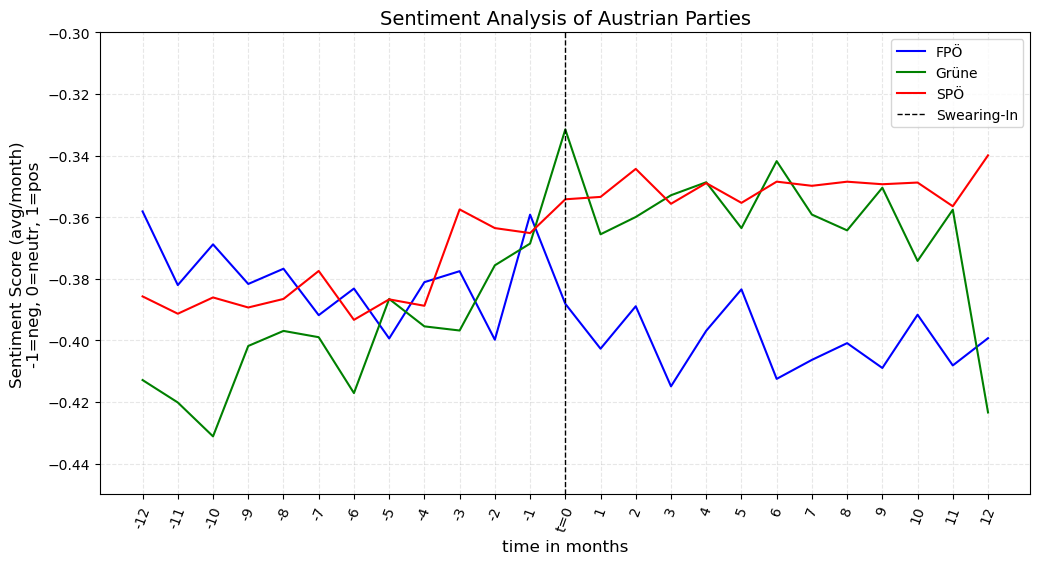

In [39]:
x_values = list(range(-12, 13))
for idx, x in enumerate(x_values):
    if x == 0:
        x_values[idx] = 't=0'
    else:
        x_values[idx] = str(x_values[idx]) #+ ' Months'


plt.figure(figsize=(12, 6))

plt.plot(x_values, fpoe_gesamt_monat.values, linestyle='-', color='b', label='FPÖ')
plt.plot(x_values, gruene_gesamt_monat.values, linestyle='-', color='g', label='Grüne' )
plt.plot(x_values, spoe_gesamt_monat.values, linestyle='-', color='r', label='SPÖ' )

# Diagrammbeschriftungen und Titel
plt.title('Sentiment Analysis of Austrian Parties', fontsize=14)
plt.ylabel('Sentiment Score (avg/month)\n-1=neg, 0=neutr, 1=pos', fontsize=12)
plt.xlabel('time in months', fontsize=12)
plt.axvline(x="t=0", color='black', linestyle='--', linewidth=1, label="Swearing-In")
plt.ylim(-.45, -.3)
#plt.axhline(y=2, color='red', linestyle='--', alpha=.3, label='Neutral')
plt.tick_params(axis='x', rotation=70)

# Gitter und Legende hinzufügen
plt.grid(True, linestyle='--', alpha=.3)
plt.legend(fontsize=10)

# Diagramm anzeigen
plt.show()

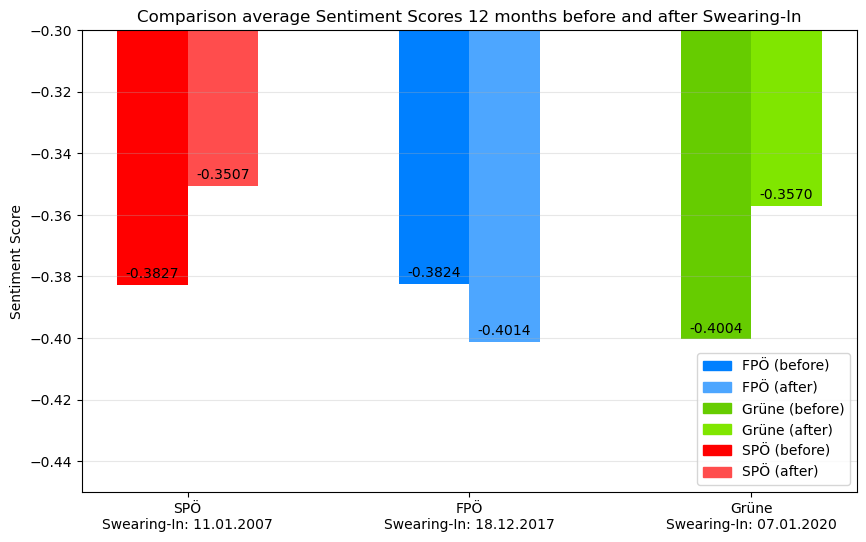

In [61]:
avg_dict = {'FPÖ': [fpoe_davor_avg, fpoe_danach_avg],
            'Grüne': [gruene_davor_avg ,gruene_danach_avg],
            'SPÖ': [spoe_davor_avg, spoe_danach_avg]}

labels = ['Vor Angelobung', 'Nach Angelobung']
bar_position = np.array([1, 2, 0])
breite = 0.25
multiplier = 0

farben_davor = ['#0080FF', '#66CC00', '#FF0000']
farben_danach = ['#4DA6FF', '#80E600', '#FF4D4D']

fig, ax = plt.subplots(figsize=(10, 6))
bar_davor = ax.bar(bar_position - breite/2, [d[0] for d in avg_dict.values()], breite, label=labels[0], color=farben_davor)
bar_danach = ax.bar(bar_position + breite/2, [d[1] for d in avg_dict.values()], breite, label=labels[1], color=farben_danach)

def werte_bars(set_bars):
    for bar in set_bars:
        height = bar.get_height()
        ax.annotate(f'{height: .4f}',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

werte_bars(bar_davor)
werte_bars(bar_danach)

legende_elemente = []
for i, (partei, farbie) in enumerate(zip(avg_dict.keys(), zip(farben_davor, farben_danach))):
    legende_elemente.append(plt.Rectangle((0,0),1,1, color=farben_davor[i], label=f'{partei} (before)'))
    legende_elemente.append(plt.Rectangle((0,0),1,1, color=farben_danach[i], label=f'{partei} (after)'))

#legende_elemente.append(plt.Line2D([0], [0], color='red', linestyle='--', alpha=.3, label='Neutral'))

x_elemente = ['FPÖ\nSwearing-In: 18.12.2017', 'Grüne\nSwearing-In: 07.01.2020', 'SPÖ\nSwearing-In: 11.01.2007']

ax.set_ylabel('Sentiment Score')
ax.set_title('Comparison average Sentiment Scores 12 months before and after Swearing-In')
ax.set_xticks(bar_position)
ax.set_xticklabels(x_elemente)
#plt.axhline(y=2, color='red', linestyle='--', alpha=.3, label='Neutral')
plt.legend(handles=legende_elemente, loc='lower right')
plt.ylim(-.45, -.3)
plt.grid(axis='y', alpha=.3)

plt.show()